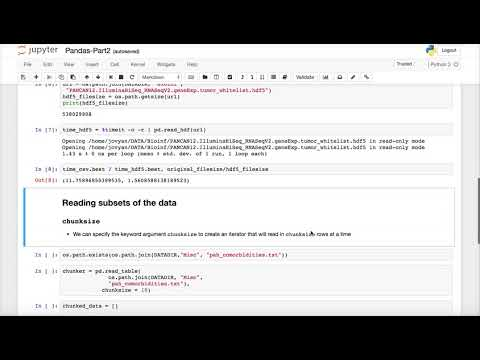

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("72HCi8VyqNE")

# [Pandas](http://pandas.pydata.org/)

In [ ]:
% matplotlib inline

In [ ]:
import os
import shutil
import glob
import sqlite3 as sqlite
DATADIR = os.path.join(os.path.expanduser("~"),"DATA")
print(os.path.exists(DATADIR))

In [ ]:
import pandas as pd

## Reading/Writing Text Data with  Pandas

## Pandas and HDF5

* HDF5 is a high performance binary data format written in C
* HDF5 facilitates a number of performance enhancements such as being able to access parts of the data without having to read into memory the whole dataset
* Python has too different packages provide an HDF5 interface
    * [h5py](http://www.h5py.org/)
    * [pytables](http://www.pytables.org/moin)
* Pandas uses pytables to interface with hdf5


In [ ]:
url = os.path.join(DATADIR, "Bioinf",
 "PANCAN12.IlluminaHiSeq_RNASeqV2.geneExp.tumor_whitelist")
time_csv = %timeit -o -r 1 pd.read_table(url)

In [ ]:
url = os.path.join(DATADIR, "Bioinf",
 "PANCAN12.IlluminaHiSeq_RNASeqV2.geneExp.tumor_whitelist.hdf5")
time_hdf5 = %timeit -o -r 1 pd.read_hdf(url)

In [ ]:
time_csv.best / time_hdf5.best

## Reading subsets of the data

### ``chunksize``

* We can specify the keyword argument ``chunksize`` to create an iterator that will read in ``chunksize`` rows at a time

In [ ]:
os.path.exists(os.path.join(DATADIR,"Misc", "pah_comorbidities.txt"))

In [ ]:
chunker = pd.read_table(
              os.path.join(DATADIR, "Misc",
              "pah_comorbidities.txt"),
            chunksize = 10)

In [ ]:
chunked_data = []

for c in chunker:
    chunked_data.append(c)
    
print (len(chunked_data))
chunked_data[0]

### We can specify what columns to use and how many rows to read
* ``nrows``: number of rows to read
* ``usecols``: a range of column numbers or collection of names of columns to use

In [ ]:
url = os.path.join(DATADIR, "Bioinf",
 "PANCAN12.IlluminaHiSeq_RNASeqV2.geneExp.tumor_whitelist")
genexp = pd.read_table(url,
            nrows=100,
            usecols=range(20,101))
print(genexp.shape)
genexp

In [ ]:

pd.read_table(url,
            nrows=100,
            usecols=["TCGA-05-4396","TCGA-05-4397",
                     "TCGA-05-4398","TCGA-05-4402",
                     "TCGA-05-4403"])